In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
print("Libraries imported!")

Libraries imported!


# Introduction

## Importing the Dataset

In [97]:
df = pd.read_csv('US_Accidents_June20.csv', error_bad_lines=False, low_memory=False)
df.head()

b'Skipping line 11079: expected 49 fields, saw 50\nSkipping line 16602: expected 49 fields, saw 79\nSkipping line 22107: expected 49 fields, saw 54\nSkipping line 30304: expected 49 fields, saw 84\nSkipping line 49582: expected 49 fields, saw 56\nSkipping line 55071: expected 49 fields, saw 61\nSkipping line 63356: expected 49 fields, saw 72\nSkipping line 71554: expected 49 fields, saw 60\nSkipping line 74266: expected 49 fields, saw 53\nSkipping line 77002: expected 49 fields, saw 60\nSkipping line 82480: expected 49 fields, saw 54\nSkipping line 96153: expected 49 fields, saw 56\nSkipping line 101617: expected 49 fields, saw 53\nSkipping line 104358: expected 49 fields, saw 56\nSkipping line 107091: expected 49 fields, saw 70\nSkipping line 109830: expected 49 fields, saw 60\n'


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [98]:
df.shape

(112535, 49)

## Dropping the duplicate rows

In [99]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (32973, 49)


In [100]:
df = df.drop_duplicates()

In [101]:
df.shape

(79562, 49)

## Dropping the missing or null values

In [102]:
df.isnull().sum().reset_index()

,index,0
0,ID,0
1,Source,1
2,TMC,0
3,Severity,0
4,Start_Time,0
5,End_Time,1
6,Start_Lat,0
7,Start_Lng,0
8,End_Lat,79557
9,End_Lng,79557


In [103]:
df.drop(['End_Lat','End_Lng','Number','Wind_Chill(F)','Precipitation(in)'],axis=1, inplace=True)

In [104]:
df.dropna(inplace=True)    # Dropping the missing values.
df.count()

ID                       59560
Source                   59560
TMC                      59560
Severity                 59560
Start_Time               59560
End_Time                 59560
Start_Lat                59560
Start_Lng                59560
Distance(mi)             59560
Description              59560
Street                   59560
Side                     59560
City                     59560
County                   59560
State                    59560
Zipcode                  59560
Country                  59560
Timezone                 59560
Airport_Code             59560
Weather_Timestamp        59560
Temperature(F)           59560
Humidity(%)              59560
Pressure(in)             59560
Visibility(mi)           59560
Wind_Direction           59560
Wind_Speed(mph)          59560
Weather_Condition        59560
Amenity                  59560
Bump                     59560
Crossing                 59560
Give_Way                 59560
Junction                 59560
No_Exit 

In [105]:
df.shape

(59560, 44)

In [106]:
list_features = ['Severity','Pressure(in)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Weather_Condition','Traffic_Signal','Traffic_Calming','Roundabout',
          'Sunrise_Sunset','Crossing','Turning_Loop','Amenity', 'Give_Way','Junction', 'No_Exit', 'Railway', 'Station','Stop']

In [107]:
for i in list_features:
    print(i,"values count is:\n",df[i].value_counts(),"\n")

Severity values count is:
 2    33250
3    26239
1       51
4       20
Name: Severity, dtype: int64 

Pressure(in) values count is:
 29.94    2285
29.96    2266
29.91    2149
29.88    2057
29.99    1939
         ... 
28.79       1
28.07       1
28.18       1
28.91       1
28.77       1
Name: Pressure(in), Length: 225, dtype: int64 

Visibility(mi) values count is:
 10.0    49943
9.0      2062
7.0      1512
8.0      1442
5.0       866
6.0       857
4.0       699
3.0       669
2.0       379
2.5       345
1.5       153
1.8       146
1.0       115
0.8        89
0.2        82
1.2        77
0.5        47
30.0       47
20.0        5
4.2         5
25.0        5
0.1         4
15.0        4
2.8         2
40.0        2
0.19        1
0.4         1
80.0        1
Name: Visibility(mi), dtype: int64 

Wind_Direction values count is:
 West        8658
WNW         6028
South       5198
SSW         4781
Variable    4427
SW          4277
WSW         4263
NW          3998
NNW         2779
SSE         2683


In [164]:
df.drop('Turning_Loop',axis=1,inplace=True) # it has only one value, so it is irrelevent

## Selecting relevent features:

The features that are selected are general. They are related to the environment (POI features), the weather conditions, and the time of the accident. These features can be extracted from any other location in the world at any moment, thus we can predict the severity of a potential accident. Features such as Civil_Twilight, Nautical_Twilight, and Astronomical_Twilight are dropped because of redundancy. Other features such as Wind_Chill(F) were dropped because of the missig values.

In [230]:
data = df[['Severity','Start_Time','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
           'Wind_Direction','Wind_Speed(mph)','Weather_Condition','Traffic_Signal','Traffic_Calming','Roundabout',
          'Sunrise_Sunset','Crossing','Amenity', 'Give_Way','Junction', 'No_Exit', 'Railway', 'Station', 
           'Stop']]
data.head()

,Severity,Start_Time,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Traffic_Signal,...,Roundabout,Sunrise_Sunset,Crossing,Amenity,Give_Way,Junction,No_Exit,Railway,Station,Stop
0,2,2016-02-08 06:49:27,36.0,100.0,29.67,10.0,SW,3.5,Overcast,True,...,False,Night,False,False,False,False,False,False,False,False
1,3,2016-02-08 07:23:34,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,False,...,False,Night,False,False,False,False,False,False,False,False
2,2,2016-02-08 07:39:07,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,True,...,False,Day,False,False,False,False,False,False,False,False
3,3,2016-02-08 07:44:26,37.9,97.0,29.63,7.0,SSW,3.5,Light Rain,False,...,False,Day,False,False,False,False,False,False,False,False
4,2,2016-02-08 07:59:35,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,False,...,False,Day,False,False,False,False,False,False,False,False


## Converting Data types:

In [231]:
data.shape

(59560, 21)

In [232]:
data.dtypes

Severity             object
Start_Time           object
Temperature(F)       object
Humidity(%)          object
Pressure(in)         object
Visibility(mi)       object
Wind_Direction       object
Wind_Speed(mph)      object
Weather_Condition    object
Traffic_Signal       object
Traffic_Calming      object
Roundabout           object
Sunrise_Sunset       object
Crossing             object
Amenity              object
Give_Way             object
Junction             object
No_Exit              object
Railway              object
Station              object
Stop                 object
dtype: object

In [233]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['Hour'] = data['Start_Time'].dt.hour
data['Month'] = data['Start_Time'].dt.month
data['Day_of_week'] = data['Start_Time'].dt.dayofweek
data.drop('Start_Time',axis=1, inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [234]:
data.reset_index(drop= True, inplace=True)

The start_Time feature can be transformed to datetime and then to three important features which are hour, month and day of the week. It can help to predict the severity of the accident. In peak hours, the traffic is more important as well as in week days.

In [235]:
data.head()

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Traffic_Signal,Traffic_Calming,...,Amenity,Give_Way,Junction,No_Exit,Railway,Station,Stop,Hour,Month,Day_of_week
0,2,36.0,100.0,29.67,10.0,SW,3.5,Overcast,True,False,...,False,False,False,False,False,False,False,6,2,0
1,3,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,False,False,...,False,False,False,False,False,False,False,7,2,0
2,2,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,True,False,...,False,False,False,False,False,False,False,7,2,0
3,3,37.9,97.0,29.63,7.0,SSW,3.5,Light Rain,False,False,...,False,False,False,False,False,False,False,7,2,0
4,2,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,False,False,...,False,False,False,False,False,False,False,7,2,0


In [236]:
data[['Traffic_Signal','Traffic_Calming','Roundabout','Sunrise_Sunset','Give_Way','Junction',
                    'Station','No_Exit','Railway','Stop','Wind_Direction','Weather_Condition','Sunrise_Sunset','Amenity','Crossing']] = data[['Traffic_Signal','Traffic_Calming','Roundabout','Sunrise_Sunset','Give_Way','Junction',
                    'Station','No_Exit','Railway','Stop','Wind_Direction','Weather_Condition','Sunrise_Sunset','Amenity','Crossing']].astype('category')
# Transforming all column to categories

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [237]:
data['Sunrise_Sunset']=data['Sunrise_Sunset'].astype('category')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [238]:
data[['Traffic_Signal','Traffic_Calming','Roundabout','Sunrise_Sunset','Give_Way','Junction',
                    'Station','No_Exit','Railway','Stop','Wind_Direction','Weather_Condition','Sunrise_Sunset','Amenity','Crossing']] = data[['Traffic_Signal','Traffic_Calming','Roundabout','Sunrise_Sunset','Give_Way','Junction',
                
                                                                                                                                              
                                                                                                                                              'Station','No_Exit','Railway','Stop','Wind_Direction','Weather_Condition','Sunrise_Sunset','Amenity','Crossing']].apply(lambda x: x.cat.codes)

In [239]:
data=data.astype('float') # transforming all data to floats

In [240]:
data.dtypes

Severity             float64
Temperature(F)       float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction       float64
Wind_Speed(mph)      float64
Weather_Condition    float64
Traffic_Signal       float64
Traffic_Calming      float64
Roundabout           float64
Sunrise_Sunset       float64
Crossing             float64
Amenity              float64
Give_Way             float64
Junction             float64
No_Exit              float64
Railway              float64
Station              float64
Stop                 float64
Hour                 float64
Month                float64
Day_of_week          float64
dtype: object

In [241]:
data.head()

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Traffic_Signal,Traffic_Calming,...,Amenity,Give_Way,Junction,No_Exit,Railway,Station,Stop,Hour,Month,Day_of_week
0,2.0,36.0,100.0,29.67,10.0,15.0,3.5,27.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0
1,3.0,35.1,96.0,29.64,9.0,15.0,4.6,25.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0
2,2.0,36.0,89.0,29.65,6.0,15.0,3.5,25.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0
3,3.0,37.9,97.0,29.63,7.0,14.0,3.5,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0
4,2.0,34.0,100.0,29.66,7.0,21.0,3.5,27.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0


In [242]:
data.shape

(59560, 23)

## Detecting Outliers

In [244]:
data.describe(include="all")

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Traffic_Signal,Traffic_Calming,...,Amenity,Give_Way,Junction,No_Exit,Railway,Station,Stop,Hour,Month,Day_of_week
count,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,...,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000
mean,2.440363,66.299992,58.986283,29.957604,9.380404,14.661635,8.207787,12.616353,0.092092,0.000470,...,0.007774,0.001024,0.118855,0.000319,0.011182,0.022146,0.023842,13.834083,7.469896,2.565027
std,0.498830,12.908846,23.114482,0.272463,1.919390,5.898362,4.485224,12.400287,0.289158,0.021677,...,0.087826,0.031987,0.323620,0.017858,0.105153,0.147159,0.152556,5.402055,3.397841,1.785742
min,1.000000,5.000000,4.000000,3.010000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,57.200000,42.000000,29.890000,10.000000,10.000000,4.600000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,5.000000,1.000000
50%,2.000000,64.900000,61.000000,29.970000,10.000000,15.000000,6.900000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,3.000000
75%,3.000000,75.000000,77.000000,30.060000,10.000000,20.000000,10.400000,27.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,11.000000,4.000000
max,4.000000,113.000000,100.000000,30.620000,80.000000,22.000000,241.700000,39.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,12.000000,6.000000


<AxesSubplot:xlabel='Temperature(F)'>

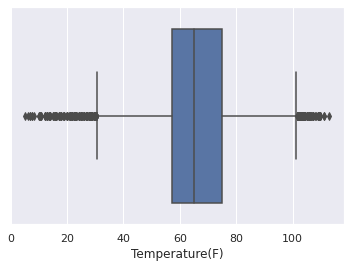

In [245]:
sns.boxplot(x=data['Temperature(F)'])

<AxesSubplot:xlabel='Humidity(%)'>

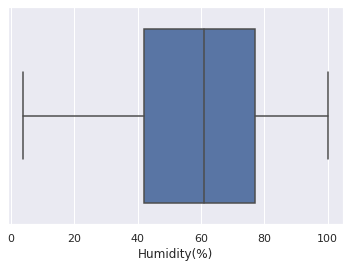

In [246]:
sns.boxplot(x=data['Humidity(%)'])

<AxesSubplot:xlabel='Pressure(in)'>

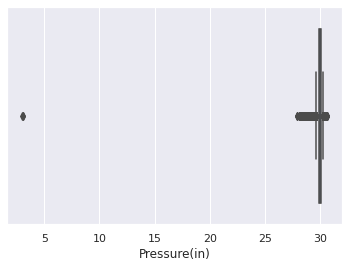

In [247]:
sns.boxplot(x=data['Pressure(in)'])

In [248]:
data.drop(data[data['Pressure(in)'] < 5 ].index,inplace=True)

<AxesSubplot:xlabel='Visibility(mi)'>

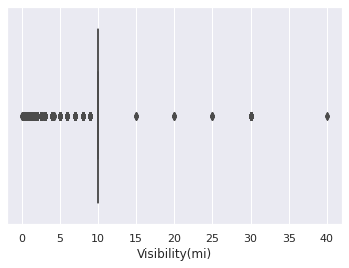

In [251]:
sns.boxplot(x=data['Visibility(mi)'])

In [250]:
data.drop(data[data['Visibility(mi)'] > 40].index,inplace=True)

<AxesSubplot:xlabel='Wind_Speed(mph)'>

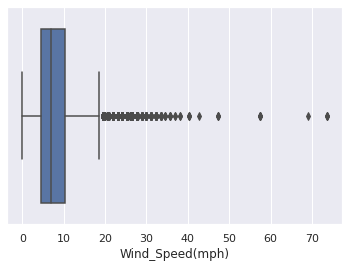

In [254]:
sns.boxplot(x=data['Wind_Speed(mph)'])

In [253]:
data.drop(data[data['Wind_Speed(mph)'] > 100 ].index,inplace=True)

In [255]:
data.reset_index(drop= True, inplace=True)

# Data analysis

## Summary

In [256]:
data.describe(include="all")

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Traffic_Signal,Traffic_Calming,...,Amenity,Give_Way,Junction,No_Exit,Railway,Station,Stop,Hour,Month,Day_of_week
count,59554.000000,59554.000000,59554.000000,59554.000000,59554.000000,59554.000000,59554.000000,59554.000000,59554.000000,59554.000000,...,59554.000000,59554.000000,59554.000000,59554.000000,59554.000000,59554.000000,59554.000000,59554.000000,59554.000000,59554.000000
mean,2.440373,66.301120,58.986332,29.958969,9.379267,14.661534,8.201540,12.616751,0.092101,0.000470,...,0.007774,0.001024,0.118867,0.000319,0.011183,0.022148,0.023844,13.834117,7.469725,2.564866
std,0.498832,12.908917,23.114116,0.194193,1.897412,5.898566,4.347197,12.400453,0.289171,0.021678,...,0.087830,0.031988,0.323635,0.017859,0.105158,0.147166,0.152564,5.402131,3.397726,1.785737
min,1.000000,5.000000,4.000000,27.880000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,57.200000,42.000000,29.890000,10.000000,10.000000,4.600000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,5.000000,1.000000
50%,2.000000,64.900000,61.000000,29.970000,10.000000,15.000000,6.900000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,3.000000
75%,3.000000,75.000000,77.000000,30.060000,10.000000,20.000000,10.400000,27.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,11.000000,4.000000
max,4.000000,113.000000,100.000000,30.620000,40.000000,22.000000,73.600000,39.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,12.000000,6.000000


In [257]:
data_grouped_severity = data.groupby(['Severity'], as_index = False).mean()
data_grouped_severity

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Traffic_Signal,Traffic_Calming,...,Amenity,Give_Way,Junction,No_Exit,Railway,Station,Stop,Hour,Month,Day_of_week
0,1.0,63.596078,64.058824,30.006078,9.411765,15.313725,8.347059,12.960784,0.098039,0.000000,...,0.039216,0.000000,0.000000,0.000000,0.000000,0.098039,0.176471,15.764706,8.235294,2.313725
1,2.0,66.213265,58.586086,29.956070,9.371615,14.448234,8.124448,12.175179,0.140167,0.000752,...,0.011460,0.001594,0.089364,0.000180,0.011520,0.028996,0.040035,13.922728,7.409734,2.530891
2,3.0,66.421100,59.476312,29.962552,9.389343,14.930213,8.298948,13.173724,0.031177,0.000114,...,0.003049,0.000305,0.156497,0.000495,0.010786,0.013340,0.003049,13.719099,7.544384,2.608606
3,4.0,61.845000,68.600000,29.956500,8.800000,15.100000,8.195000,15.100000,0.100000,0.000000,...,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,12.500000,7.300000,2.300000


In [159]:
data['Severity'] = data['Severity'].cat.codes

In [160]:
data['Severity'].head()

0    1
1    2
2    1
3    2
4    1
Name: Severity, dtype: int8

## Correlation

In [260]:
data.corr()['Severity'].sort_values()

Traffic_Signal      -0.186074
Crossing            -0.136795
Stop                -0.122309
Station             -0.053948
Amenity             -0.048250
Give_Way            -0.019850
Hour                -0.019750
Traffic_Calming     -0.014488
Roundabout          -0.006266
Railway             -0.003294
Visibility(mi)       0.004249
Temperature(F)       0.008104
No_Exit              0.008733
Pressure(in)         0.015864
Humidity(%)          0.018906
Month                0.018953
Sunrise_Sunset       0.019692
Wind_Speed(mph)      0.019730
Day_of_week          0.021675
Weather_Condition    0.039891
Wind_Direction       0.040140
Junction             0.103243
Severity             1.000000
Name: Severity, dtype: float64

<AxesSubplot:>

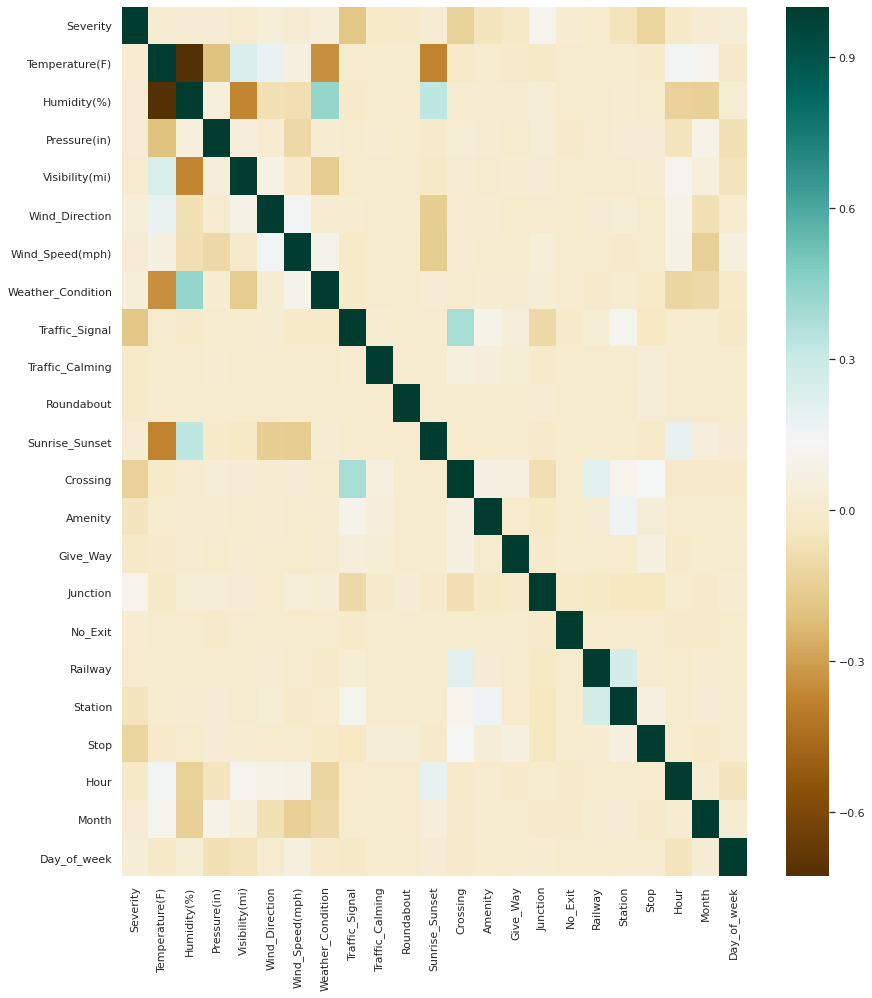

In [261]:
plt.figure(figsize=(10,10))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=False)

In [269]:
data.to_csv('clean_data.csv')

## Data Visualization

### Converting Severity and renaming the categories

In [270]:
data['Severity']=pd.Series(pd.Categorical(data['Severity'], categories=[1,2,3,4]))
data['Severity']=data['Severity'].cat.rename_categories(['Low','Medium','High','Very High'])
data.head()

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Traffic_Signal,Traffic_Calming,...,Amenity,Give_Way,Junction,No_Exit,Railway,Station,Stop,Hour,Month,Day_of_week
0,Medium,36.0,100.0,29.67,10.0,15.0,3.5,27.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0
1,High,35.1,96.0,29.64,9.0,15.0,4.6,25.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0
2,Medium,36.0,89.0,29.65,6.0,15.0,3.5,25.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0
3,High,37.9,97.0,29.63,7.0,14.0,3.5,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0
4,Medium,34.0,100.0,29.66,7.0,21.0,3.5,27.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0


### Time features and Severity of Accidents

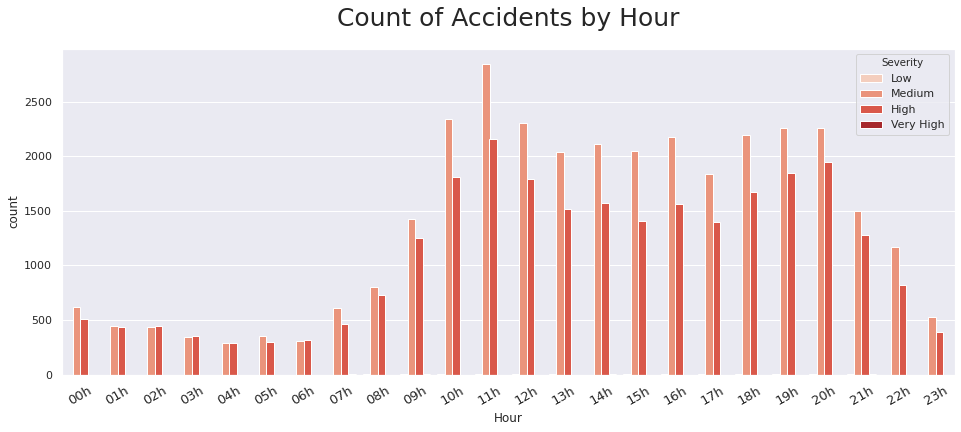

In [138]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Hour',hue='Severity', data=data ,palette="Reds",ax=ax)
plt.title('Count of Accidents by Hour', size=25, y=1.05)
plt.xticks(size = 13,rotation=30,ticks=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0],labels=['00h','01h','02h','03h','04h','05h','06h','07h','08h','09h','10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h','21h','22h','23h'])
plt.show()

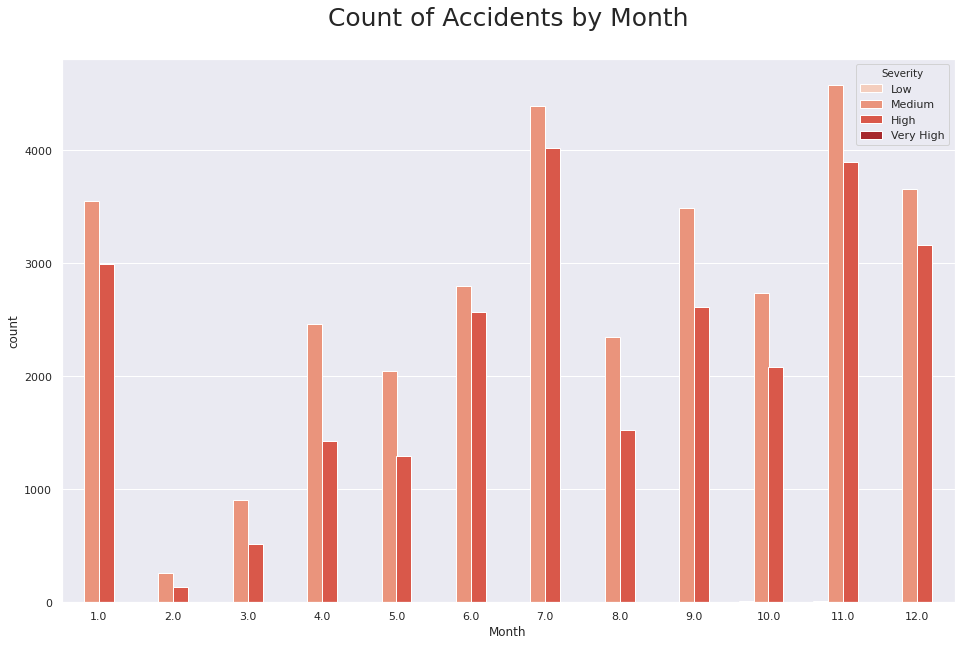

In [139]:
fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Month', hue='Severity', data=data ,palette="Reds", ax=ax)
plt.title('Count of Accidents by Month', size=25, y=1.05)
plt.show()

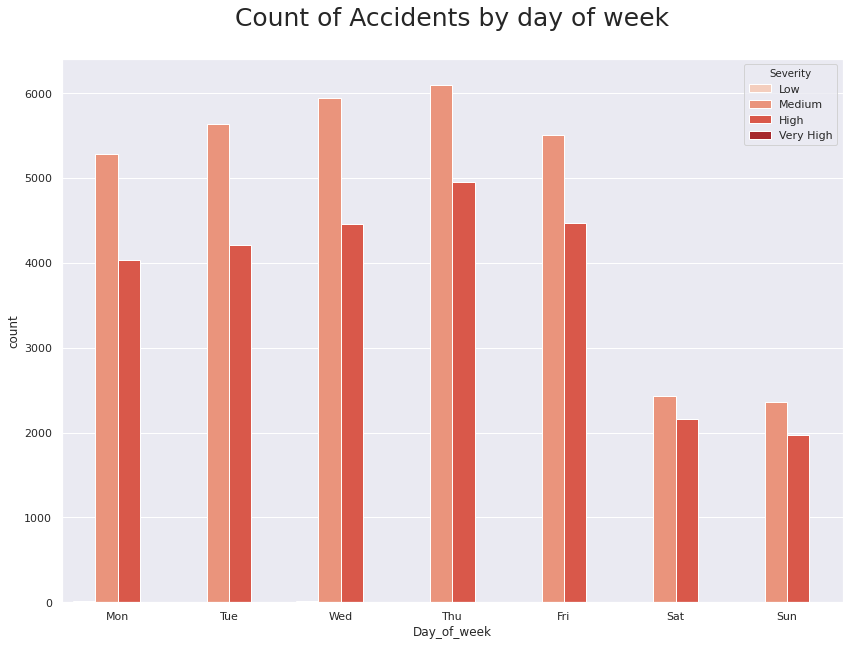

In [140]:
fig_dims = (14, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Day_of_week',hue='Severity', data=data ,palette="Reds",ax=ax)
plt.title('Count of Accidents by day of week', size=25, y=1.05)
plt.xticks(ticks=[0.0,1.0,2.0,3.0,4.0,5.0,6.0],labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

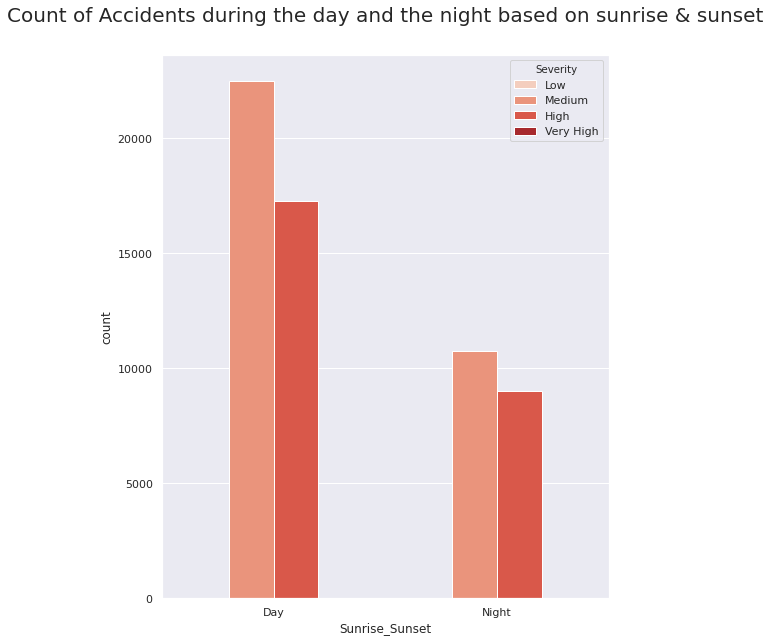

In [141]:
fig_dims = (8, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Sunrise_Sunset',hue='Severity', data=data ,palette="Reds",ax=ax)
plt.title('Count of Accidents during the day and the night based on sunrise & sunset', size=20, y=1.05)
plt.xticks(ticks=[0.0,1.0],labels=['Day','Night'])
plt.show()

### Weather features and Severity of Accidents

<AxesSubplot:>

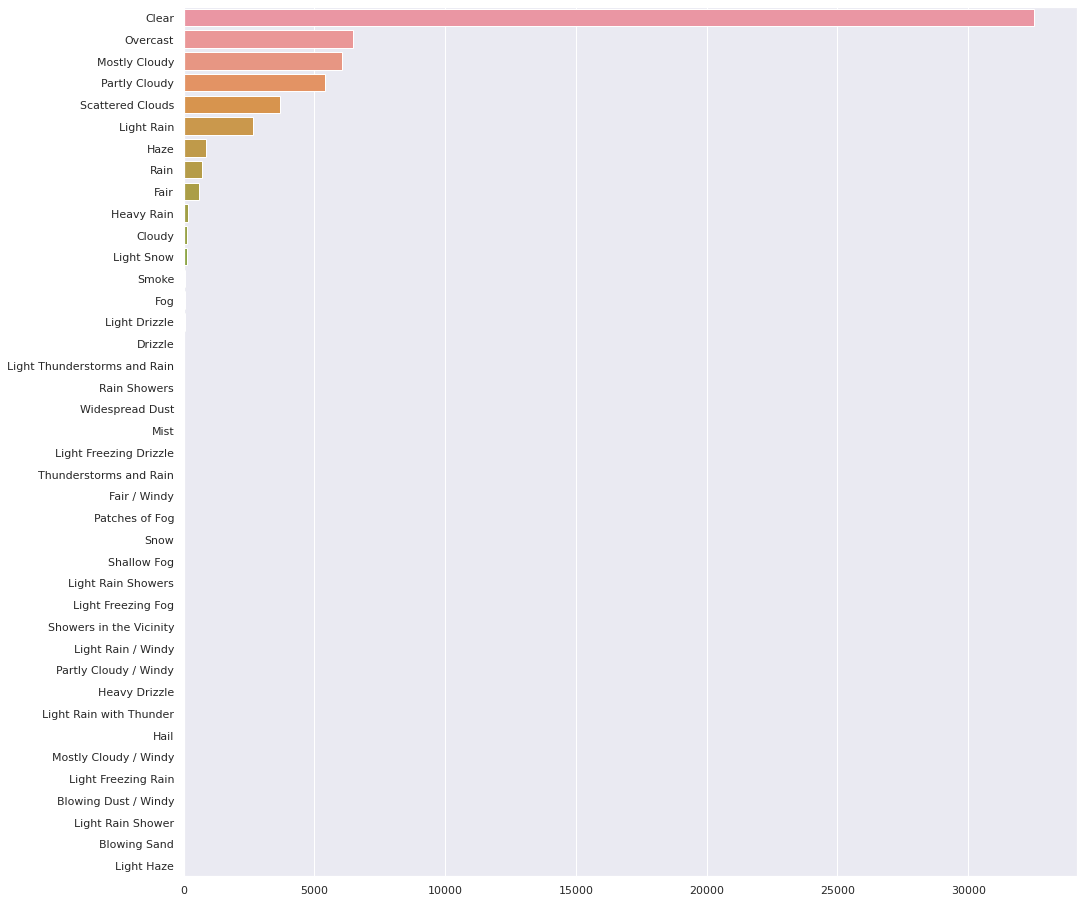

In [142]:
Weather = df.Weather_Condition.value_counts()
plt.figure(figsize=(16, 16))
sns.barplot(Weather.values, Weather.index)

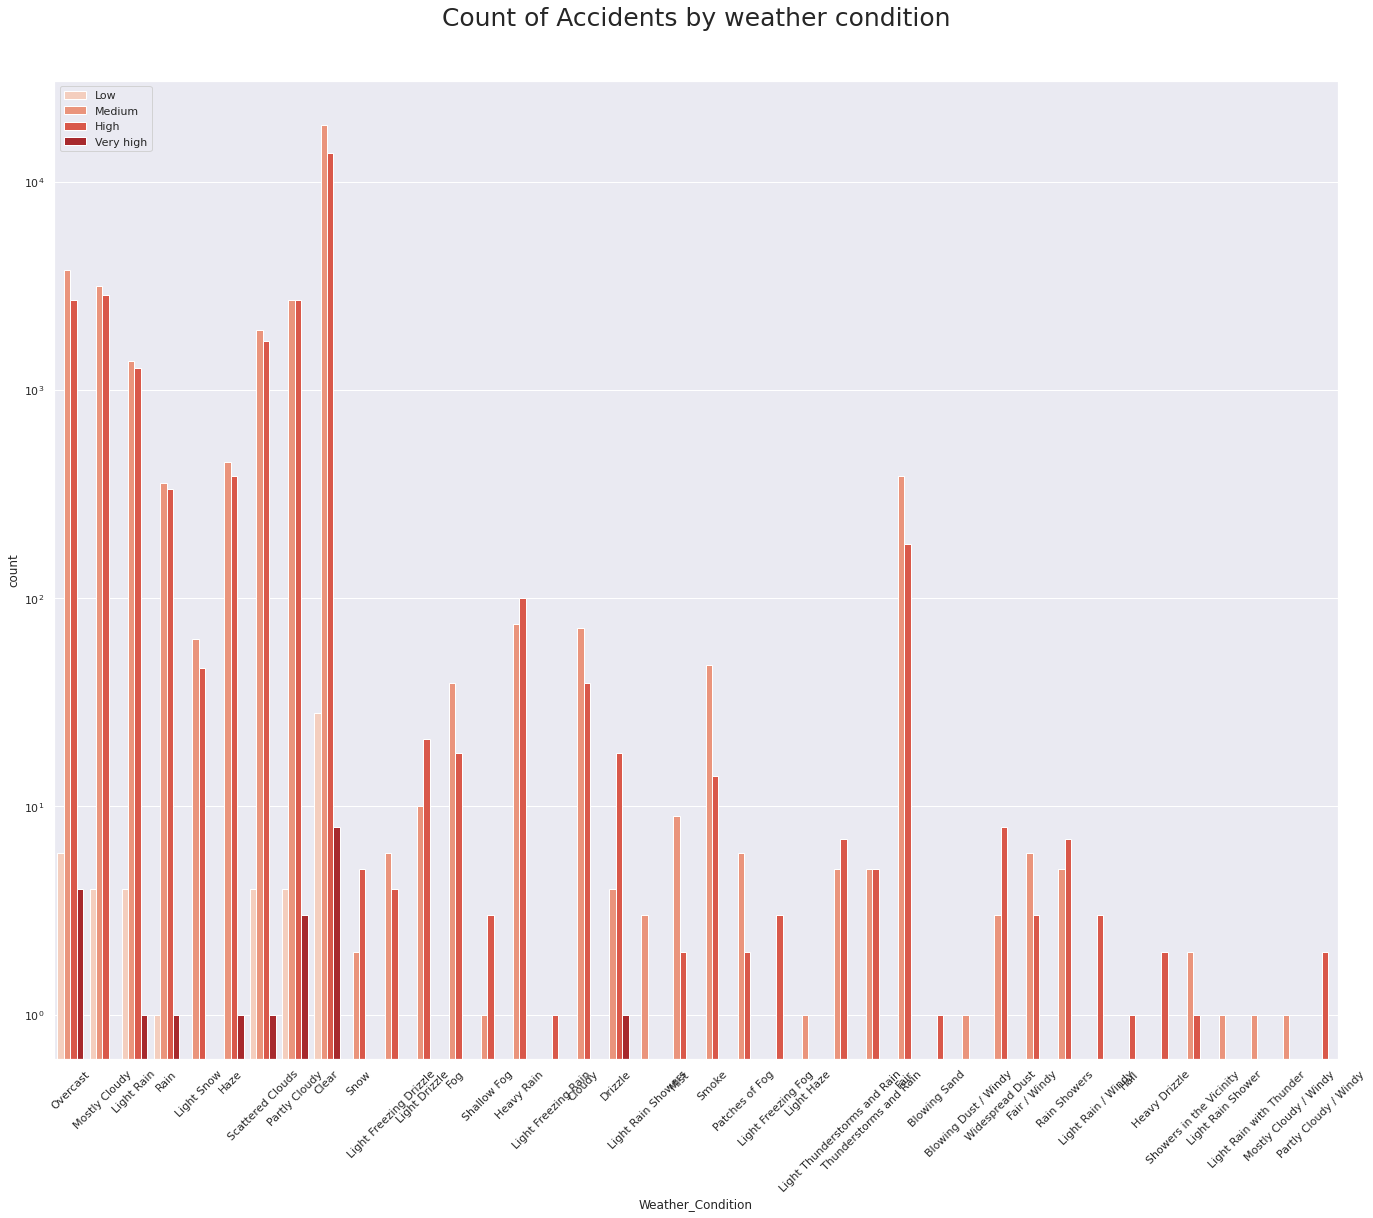

In [152]:
fig_dims = (23, 18)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Weather_Condition',hue="Severity", data=df ,palette="Reds",ax=ax)
plt.title('Count of Accidents by weather condition', size=25, y=1.05)
plt.xticks(rotation = 45, size = 11)
ax.legend(labels=['Low','Medium','High','Very high'])
plt.yscale('log')
plt.show()

**Normalize features with extreamly skewed distribution**

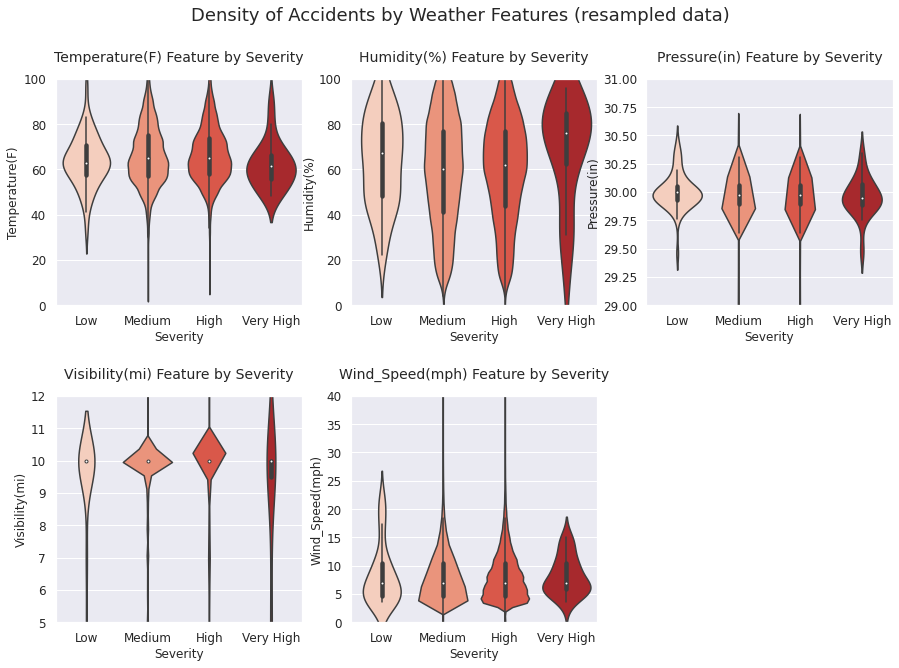

In [153]:
num_features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(2, 3, i)
    sns.violinplot(x="Severity", y=feature, data=data, palette="Reds")
    
    plt.ylabel('{}'.format(feature), size=12, labelpad=3)
    plt.xlabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    if feature == 'Pressure(in)':
        plt.ylim(29,31)
    elif feature == 'Visibility(mi)':
        plt.ylim(5, 12)
    elif feature == 'Wind_Speed(mph)':
        plt.ylim(0, 40)
    else:
        plt.ylim(0, 100)
        
    plt.title('{} Feature by Severity'.format(feature), size=14, y=1.05)
fig.suptitle('Density of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

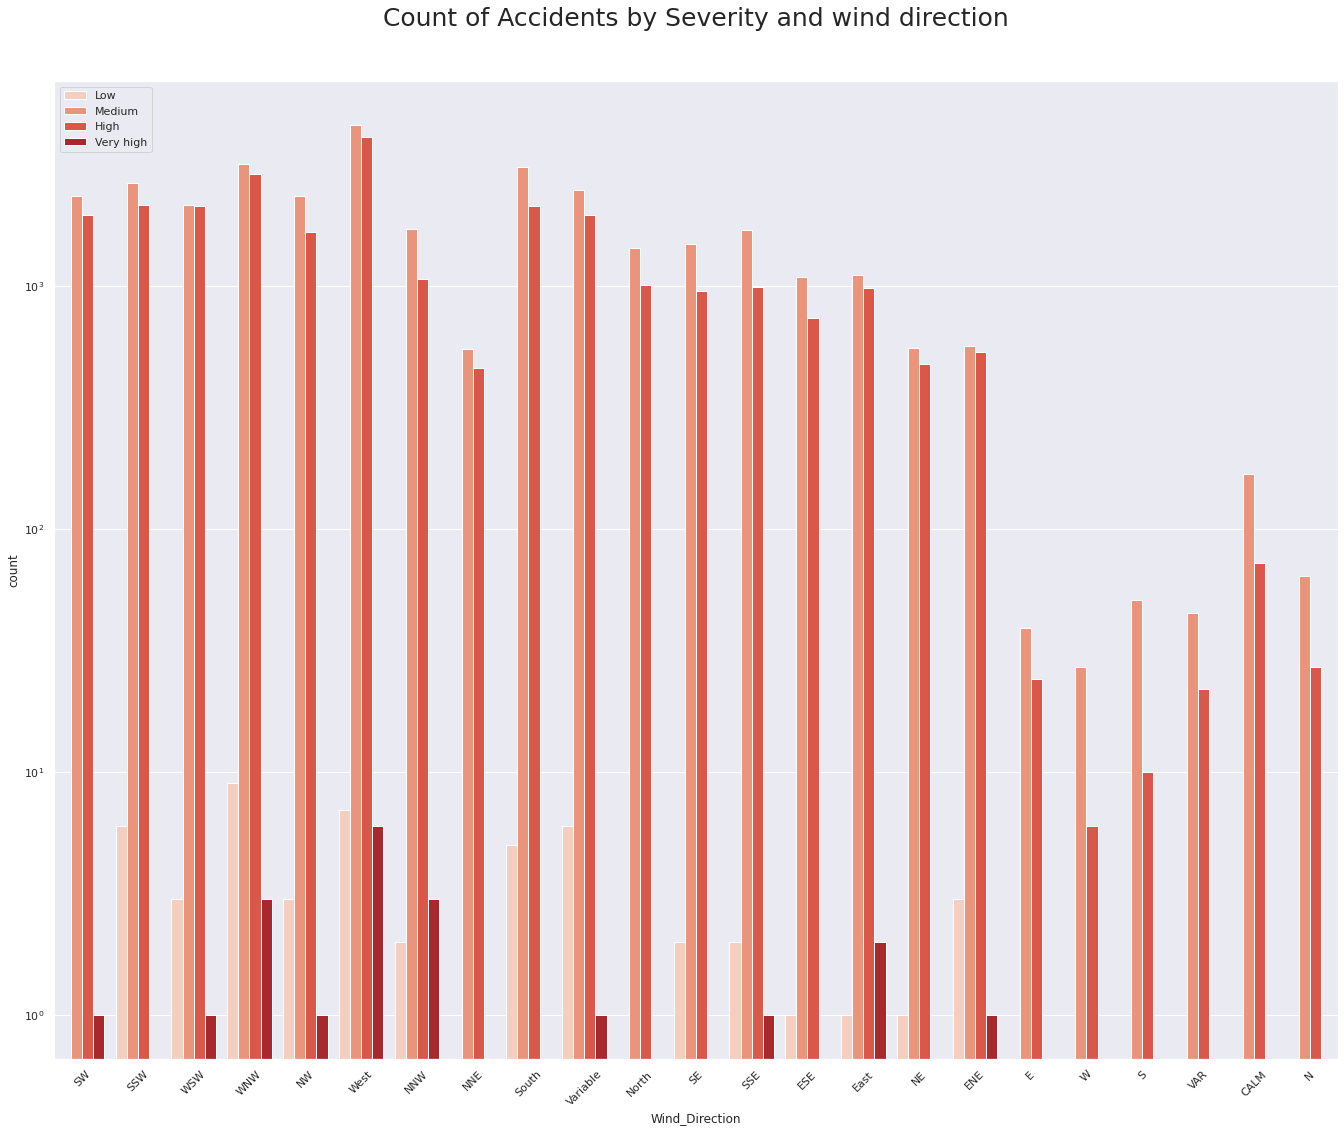

In [259]:
fig_dims = (23, 18)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Wind_Direction',hue="Severity", data=df ,palette="Reds",ax=ax)
plt.title('Count of Accidents by Severity and wind direction', size=25, y=1.05)
plt.xticks(rotation = 45, size = 11)
ax.legend(labels=['Low','Medium','High','Very high'])
plt.yscale('log')
plt.show()

### POI Feautures and Severity of Accidents

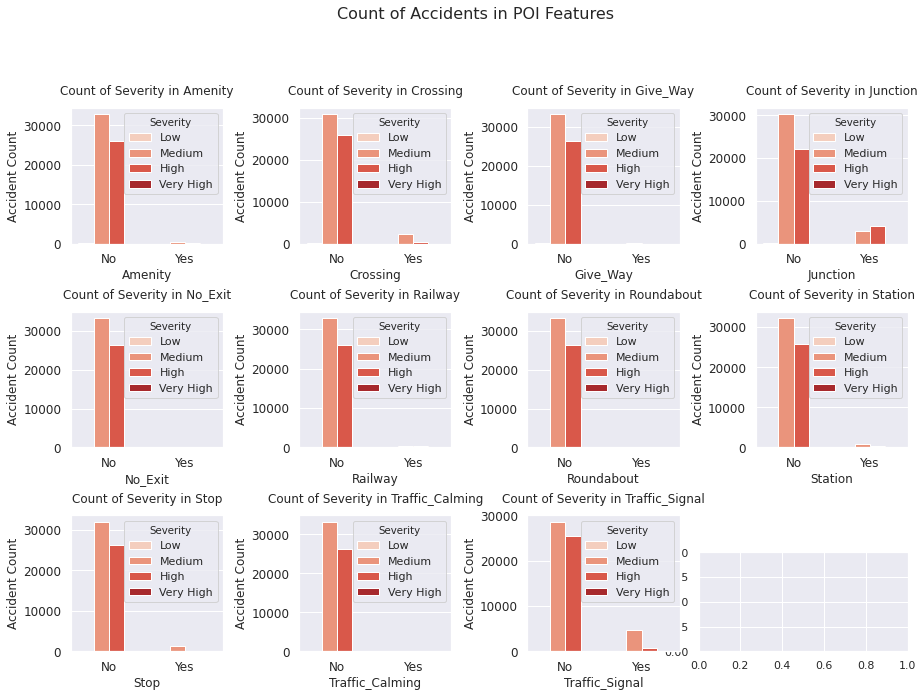

In [154]:
POI_features = ['Amenity','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Severity', data=data ,palette="Reds")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    plt.xticks(ticks=[0.0,1.0], labels = ['No','Yes'])
    
    plt.title('Count of Severity in {}'.format(feature), size=12, y=1.05)
fig.suptitle('Count of Accidents in POI Features',y=1.02, fontsize=16)
plt.show()

# Model

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
print('check!')

check!


## Import the clean dataset

In [2]:
data = pd.read_csv('clean_data.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Traffic_Signal,Traffic_Calming,...,Amenity,Give_Way,Junction,No_Exit,Railway,Station,Stop,Hour,Month,Day_of_week
0,2.0,36.0,100.0,29.67,10.0,15.0,3.5,27.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0
1,3.0,35.1,96.0,29.64,9.0,15.0,4.6,25.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0
2,2.0,36.0,89.0,29.65,6.0,15.0,3.5,25.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0
3,3.0,37.9,97.0,29.63,7.0,14.0,3.5,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0
4,2.0,34.0,100.0,29.66,7.0,21.0,3.5,27.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0


## Feature selection

In [3]:
Features = data[['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
           'Wind_Direction','Wind_Speed(mph)','Weather_Condition','Traffic_Signal','Traffic_Calming','Roundabout',
          'Sunrise_Sunset','Crossing','Amenity', 'Give_Way','Junction', 'No_Exit', 'Railway', 'Station', 
           'Stop','Hour','Month','Day_of_week']]
Features.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Traffic_Signal,Traffic_Calming,Roundabout,...,Amenity,Give_Way,Junction,No_Exit,Railway,Station,Stop,Hour,Month,Day_of_week
0,36.0,100.0,29.67,10.0,15.0,3.5,27.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0
1,35.1,96.0,29.64,9.0,15.0,4.6,25.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0
2,36.0,89.0,29.65,6.0,15.0,3.5,25.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0
3,37.9,97.0,29.63,7.0,14.0,3.5,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0
4,34.0,100.0,29.66,7.0,21.0,3.5,27.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0


In [4]:
X=Features.values
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-2.34732127,  1.77441405, -1.48805783,  0.32714975,  0.05738153,
        -1.08151976,  1.15990676,  3.13968337, -0.02168831, -0.00709767,
         1.41792616, -0.21985964, -0.08851764, -0.03202079, -0.36729053,
        -0.01786449, -0.10634663, -0.15049787, -0.15628924, -1.45020233,
        -1.60983306, -1.43631868],
       [-2.41704111,  1.60135818, -1.64254425, -0.19988837,  0.05738153,
        -0.82848101,  0.99862098, -0.31850345, -0.02168831, -0.00709767,
         1.41792616, -0.21985964, -0.08851764, -0.03202079, -0.36729053,
        -0.01786449, -0.10634663, -0.15049787, -0.15628924, -1.26508863,
        -1.60983306, -1.43631868],
       [-2.34732127,  1.2985104 , -1.59104877, -1.78100273,  0.05738153,
        -1.08151976,  0.99862098,  3.13968337, -0.02168831, -0.00709767,
        -0.70525534, -0.21985964, -0.08851764, -0.03202079, -0.36729053,
        -0.01786449, -0.10634663, -0.15049787, -0.15628924, -1.26508863,
        -1.60983306, -1.43631868],
       [-2.20013495

In [6]:
y = data['Severity'].values
y[0:5]

array([2., 3., 2., 3., 2.])

## Classification

### K Nearest Neighbor(KNN)

In [7]:
# We split the X into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (50620, 22) (50620,)
Test set: (8934, 22) (8934,)


**Finding the best K**

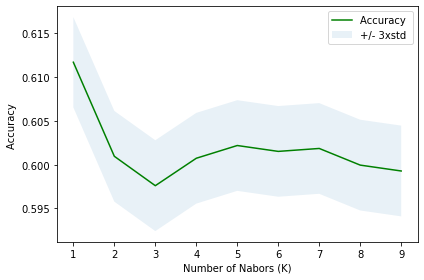

The best accuracy was with 0.6117080814864563 with k= 1


In [7]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

**Classification Model**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

**Predicting**

In [9]:
yhat_knn = neigh.predict(X_test)
yhat_knn[0:5]

array([2., 2., 2., 2., 3.])

**Accuracy evaluation (jaccard_similarity_score function)**

In [9]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.9663176610035559
Test set Accuracy:  0.6117080814864563


### Decision Tree

**Classification Model**

In [10]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", splitter = "best", max_depth = 30)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Predicting**

In [11]:
yhat_DT = DT_model.predict(X_test)
yhat_DT[0:5]

array([2., 2., 2., 2., 3.])

In [13]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DT_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_DT))

Train set Accuracy:  0.9277360726985381
Test set Accuracy:  0.6017461383478845


**Visualization of the Deccision Tree**

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

dot_data = StringIO()
filename = "Severity_tree.png"
featureNames = Features.columns
targetNames = data["Severity"].unique().tolist()
out=tree.export_graphviz(DT_model,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train.astype(str)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Evaluation of the Models

In [23]:
Models = ('KNN','DecisionTree')
acc_knn = metrics.accuracy_score(y_test, yhat_knn)
ac_DT = metrics.accuracy_score(y_test, yhat_DT)
J_knn = jaccard_similarity_score(y_test, yhat_knn)
J_DT = jaccard_similarity_score(y_test, yhat_DT)
F_knn = f1_score(y_test, yhat_knn, average='weighted')
F_DT = f1_score(y_test, yhat_DT, average='weighted')

In [24]:
Accuracy = [acc_knn, ac_DT]
Jaccards = [J_knn, J_DT]
F1s = [F_knn, F_DT]

In [25]:
results = pd.DataFrame({'Models' : Models,
                        'Jaccard': Jaccards,
                        'F1s' : F1s })
results

,Models,Jaccard,F1s
0,KNN,0.611708,0.611855
1,DecisionTree,0.603537,0.602625


In [12]:
actual_predicted_knn = pd.DataFrame({'Actual' : y_test,
                        'Predicted': yhat_knn})

In [18]:
actual_predicted_DT = pd.DataFrame({'Actual' : y_test,
                        'Predicted': yhat_DT})

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

Text(0.5, 1.0, 'Actual vs Predicted values for KNN')

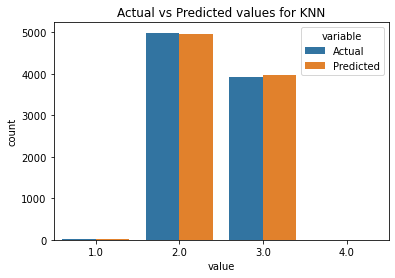

In [19]:
sns.countplot(x="value", hue="variable", data=pd.melt(actual_predicted_knn))
plt.title('Actual vs Predicted values for KNN')

Text(0.5, 1.0, 'Actual vs Predicted values for Decision Tree')

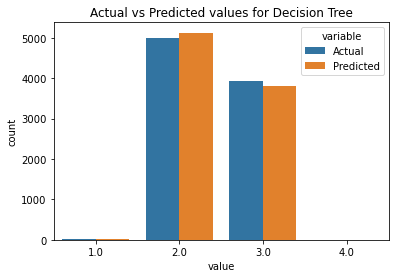

In [20]:
sns.countplot(x="value", hue="variable", data=pd.melt(actual_predicted_DT))
plt.title('Actual vs Predicted values for Decision Tree')

**Confusion Matrix**

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.coolwarm):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[   0    8    2    0]
 [   8 3235 1744    1]
 [   1 1699 2230    2]
 [   0    3    1    0]]


<Figure size 432x288 with 0 Axes>

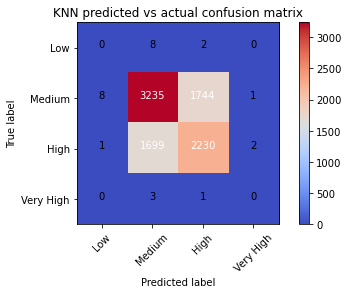

<Figure size 432x288 with 0 Axes>

In [50]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_knn, labels=[1,2,3,4])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Low','Medium','High','Very High'],normalize= False,  title='Confusion matrix')
plt.title('KNN predicted vs actual confusion matrix')
plt.figure()

Confusion matrix, without normalization
[[   0    8    2    0]
 [   6 3289 1691    2]
 [   2 1826 2103    1]
 [   0    3    1    0]]


<Figure size 432x288 with 0 Axes>

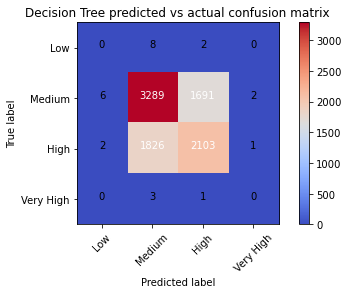

<Figure size 432x288 with 0 Axes>

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_DT, labels=[1,2,3,4])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Low','Medium','High','Very High'],normalize= False,  title='Confusion matrix')
plt.title('Decision Tree predicted vs actual confusion matrix')
plt.figure()